<a href="https://colab.research.google.com/github/marygizem/-Machine-Learning-and-Predictive-Analytics/blob/main/MO_IT134_Draft_of_Milestone_1_Project_Predictive_Model_BSIT_S3101_Decastillo%2C_PL_%2C_Ramos%2C_MG_%2C_Alcantara%2C_RA_%2C_Tavera%2C_RK_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("customers_data.csv")
products = pd.read_csv("products_data.csv")
transactions = pd.read_csv("transactions_data.csv")

#View shape (rows, columns)
print(customers.shape)
print(products.shape)
print(transactions.shape)



(100, 4)
(20, 3)
(10000, 8)


In [ ]:
#Preview Data

customers.head(10)
products.head(10)
transactions.head(10)

,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,0.0,1.0,88.0,6.0,NaN,2024/03/26,194379.147964,1075200.0
1,1.0,2.0,29.0,19.0,16.0,"July 09, 2024",97930.993380,1428000.0
2,2.0,NaN,28.0,18.0,6.0,04/13/2024,126095.547778,940800.0
3,3.0,4.0,85.0,12.0,12.0,09-06-2023,NaN,1008000.0
4,4.0,5.0,47.0,3.0,8.0,07/06/2021,99575.609634,705600.0
5,5.0,6.0,80.0,11.0,4.0,2021/07/12,160658.675350,627200.0
6,NaN,7.0,NaN,NaN,14.0,2023/11/01,133548.749710,1960000.0
7,7.0,8.0,21.0,20.0,7.0,"October 31, 2023",229217.941468,1792000.0
8,8.0,9.0,96.0,1.0,14.0,25-02-2024,144758.783254,NaN
9,9.0,10.0,3.0,20.0,6.0,29-03-2021,238293.851303,1120000.0


We'll start by merging the cleaned transactions data with customers using Company_ID. Then, we'll take that combined data and merge it with the products data using Product_ID. This will give you a comprehensive dataset that includes information from all three sources, with all transactions preserved

In [ ]:
# Merge transactions_cleaned with customers on Company_ID
merged_data = pd.merge(transactions_cleaned, customers, on='Company_ID', how='left')

# Merge the result with products on Product_ID
merged_data = pd.merge(merged_data, products, on='Product_ID', how='left')

# Display the first few rows of the merged DataFrame
display(merged_data.head())

# Display the shape of the merged DataFrame
print(f"Shape of the merged DataFrame: {merged_data.shape}")

,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Company_Name,Company_Profit,Address,Product_Name,Product_Price_y
0,2.0,29.0,19.0,16.0,2021-02-21,97930.993380,1428000.0,Sky Industries 29,61952.0,"Edsa, brgy. 606, makati, philippines!",EcoNomix Modeler,"?95,200"
1,5.0,47.0,3.0,8.0,2021-02-21,99575.609634,705600.0,Green Industries 47,31130.0,"Taft Ave, Barangay 707, Mandaluyong, Philippines",TrendWise Forecaster,"?100,800"
2,6.0,80.0,11.0,4.0,2021-07-12,160658.675350,627200.0,Green Partners 80,111227.0,"Commonwealth Ave, Barangay 202, Manila, Philip...",OptiFlow Automation,"?156,800"
3,8.0,21.0,20.0,7.0,2021-02-21,229217.941468,1792000.0,Dynamic Enterprises 21,NaN,"Ortigas Ave, Barangay 707, Davao City, Philipp...",FinSphere Intelligence Suite,"?224,000"
4,10.0,3.0,20.0,6.0,2021-02-21,238293.851303,1120000.0,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines",FinSphere Intelligence Suite,"?224,000"


Shape of the merged DataFrame: (5329, 12)


In [ ]:
products.head(10)

,Product_ID,Product_Name,Product_Price
0,1.0,FinPredictor Suite,"?140,000"
1,2.0,MarketMinder Analytics,"?168,000"
2,3.0,TrendWise Forecaster,"?100,800"
3,4.0,CustomerScope Insights,"?123,200"
4,5.0,SalesSync Optimizer,"?84,000"
5,6.0,RevenueVue Dashboard,"?179,200"
6,7.0,DataBridge Integration Tool,"?151,200"
7,NaN,RiskRadar Monitor,"?151,200"
8,9.0,Product 9,"?112,000"
9,10.0,SegmentX Targeting,"?89,600"


In [ ]:
#Duplicate columns = columns with identical values.
def duplicate_columns_info(df):
    dup_mask = df.T.duplicated()
    dup_columns = df.columns[dup_mask]

    return {
        "duplicate_columns": list(dup_columns),
        "duplicate_count": dup_mask.sum()
    }

#Check duplicate columns for each file
customers_dups = duplicate_columns_info(customers)
transactions_dups = duplicate_columns_info(transactions)
products_dups = duplicate_columns_info(products)

customers_dups, transactions_dups, products_dups

def print_duplicate_columns(name, result):
    print(f"\n{name}")
    print("Duplicate column count:", result["duplicate_count"])
    print("Duplicate columns:", result["duplicate_columns"])

print_duplicate_columns("Customers Data", customers_dups)
print_duplicate_columns("Transactions Data", transactions_dups)
print_duplicate_columns("Products Data", products_dups)



Customers Data
Duplicate column count: 0
Duplicate columns: []

Transactions Data
Duplicate column count: 0
Duplicate columns: []

Products Data
Duplicate column count: 0
Duplicate columns: []


In [ ]:
#Drop Unnamed Column as this is data is too redundant with Transaction_ID

transactions.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

In [ ]:
customers.head(10)
products.head(10)
transactions.head(10)

,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,1.0,88.0,6.0,NaN,2024/03/26,194379.147964,1075200.0
1,2.0,29.0,19.0,16.0,"July 09, 2024",97930.993380,1428000.0
2,NaN,28.0,18.0,6.0,04/13/2024,126095.547778,940800.0
3,4.0,85.0,12.0,12.0,09-06-2023,NaN,1008000.0
4,5.0,47.0,3.0,8.0,07/06/2021,99575.609634,705600.0
5,6.0,80.0,11.0,4.0,2021/07/12,160658.675350,627200.0
6,7.0,NaN,NaN,14.0,2023/11/01,133548.749710,1960000.0
7,8.0,21.0,20.0,7.0,"October 31, 2023",229217.941468,1792000.0
8,9.0,96.0,1.0,14.0,25-02-2024,144758.783254,NaN
9,10.0,3.0,20.0,6.0,29-03-2021,238293.851303,1120000.0


In [ ]:
#Standardize the Transaction Date format to better understand column

transactions["Transaction_Date"] = pd.to_datetime(transactions["Transaction_Date"], errors='coerce')

transactions.head()

,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,1.0,88.0,6.0,NaN,2024-03-26,194379.147964,1075200.0
1,2.0,29.0,19.0,16.0,NaT,97930.993380,1428000.0
2,NaN,28.0,18.0,6.0,NaT,126095.547778,940800.0
3,4.0,85.0,12.0,12.0,NaT,NaN,1008000.0
4,5.0,47.0,3.0,8.0,NaT,99575.609634,705600.0


### Imputing Missing `Transaction_Date` values with the Mode

Given the high percentage of `NaT` values in `Transaction_Date` (4329 out of 9000 rows in `transactions_cleaned`), dropping these rows would result in substantial data loss. A common strategy to handle such a situation is to impute the missing values with the **mode** (most frequent value) of the column. This approach helps preserve the dataset size while assigning a statistically representative date.

First, let's find the most frequent `Transaction_Date`.

In [ ]:
# Calculate the mode of the 'Transaction_Date' column in transactions_cleaned
# .mode()[0] is used because mode() can return multiple modes if they have the same frequency
most_frequent_date = transactions_cleaned['Transaction_Date'].mode()[0]

print(f"The most frequent transaction date is: {most_frequent_date}")

The most frequent transaction date is: 2021-02-21


Now, we will fill the `NaT` values in the `Transaction_Date` column with this most frequent date.

In [ ]:
# Fill NaT values in 'Transaction_Date' with the most frequent date
transactions_cleaned['Transaction_Date'].fillna(most_frequent_date, inplace=True)

# Verify that there are no more NaT values in 'Transaction_Date'
print("Missing values in 'Transaction_Date' after imputation:")
display(transactions_cleaned['Transaction_Date'].isna().sum())

# Display the first few rows of the updated DataFrame to see the changes
display(transactions_cleaned.head())

Missing values in 'Transaction_Date' after imputation:


/tmp/ipython-input-3197806433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_cleaned['Transaction_Date'].fillna(most_frequent_date, inplace=True)


np.int64(0)

,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
1,2.0,29.0,19.0,16.0,2021-02-21,97930.993380,1428000.0
4,5.0,47.0,3.0,8.0,2021-02-21,99575.609634,705600.0
5,6.0,80.0,11.0,4.0,2021-07-12,160658.675350,627200.0
7,8.0,21.0,20.0,7.0,2021-02-21,229217.941468,1792000.0
9,10.0,3.0,20.0,6.0,2021-02-21,238293.851303,1120000.0


In [ ]:
# Display summary statistics for numerical columns in merged_data
display(merged_data.describe())

,Transaction_ID,Company_ID,Product_ID,Quantity,Product_Price_x,Total_Cost,Company_Profit
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5.329000e+03,4181.000000
mean,5019.826234,50.836179,10.553199,10.555639,134823.058454,1.428755e+06,76841.780914
std,2884.960700,29.101001,5.746084,5.824507,39354.618001,9.150763e+05,27032.069043
min,2.000000,1.000000,1.000000,0.000000,75613.362923,8.400000e+04,30663.000000
25%,2552.000000,25.000000,6.000000,6.000000,100431.464460,7.000000e+05,52787.000000
50%,5013.000000,51.000000,11.000000,11.000000,131074.205791,1.344000e+06,74653.000000
75%,7501.000000,77.000000,16.000000,16.000000,162487.747730,1.971200e+06,100977.000000
max,9997.000000,100.000000,20.000000,21.000000,246198.010940,4.480000e+06,118114.000000


In [ ]:
#Count missing values per column

transactions.isna().sum()

,0
Transaction_ID,1000
Company_ID,1000
Product_ID,1000
Quantity,1000
Transaction_Date,7480
Product_Price,1000
Total_Cost,1000


In [ ]:
# Save the merged DataFrame to a CSV file
merged_data.to_csv('merged_data.csv', index=False)

print("merged_data.csv has been successfully created and saved.")

merged_data.csv has been successfully created and saved.


In [ ]:
print("Missing values in 'Transaction_Date' column of merged_data:")
display(merged_data['Transaction_Date'].isna().sum())

Missing values in 'Transaction_Date' column of merged_data:


np.int64(0)

# Task
Analyze the `merged_data` DataFrame by checking data types, visualizing missing values and distributions of numerical columns, inspecting categorical columns for inconsistencies, and identifying redundant or irrelevant columns, especially `Product_Price_x` and `Product_Price_y`.

## Check Data Types

### Subtask:
Examine the data types of all columns in `merged_data` using `.info()` to identify any columns with incorrect or mixed data types.


**Reasoning**:
To examine the data types of all columns in `merged_data` and identify any columns with incorrect or mixed data types, I will use the `.info()` method on the `merged_data` DataFrame.



In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    5329 non-null   float64
 1   Company_ID        5329 non-null   float64
 2   Product_ID        5329 non-null   float64
 3   Quantity          5329 non-null   float64
 4   Transaction_Date  5329 non-null   object 
 5   Product_Price_x   5329 non-null   float64
 6   Total_Cost        5329 non-null   float64
 7   Company_Name      4793 non-null   object 
 8   Company_Profit    4181 non-null   float64
 9   Address           4793 non-null   object 
 10  Product_Name      4799 non-null   object 
 11  Product_Price_y   4799 non-null   object 
dtypes: float64(7), object(5)
memory usage: 499.7+ KB


## Analyze Missing Values

### Subtask:
Identify and quantify missing values across all columns in `merged_data` using `.isna().sum()` and visualize them to understand their distribution.


**Reasoning**:
To visualize the distribution of missing values, I will create a heatmap using seaborn.heatmap() on the boolean DataFrame indicating missing values in `merged_data`.



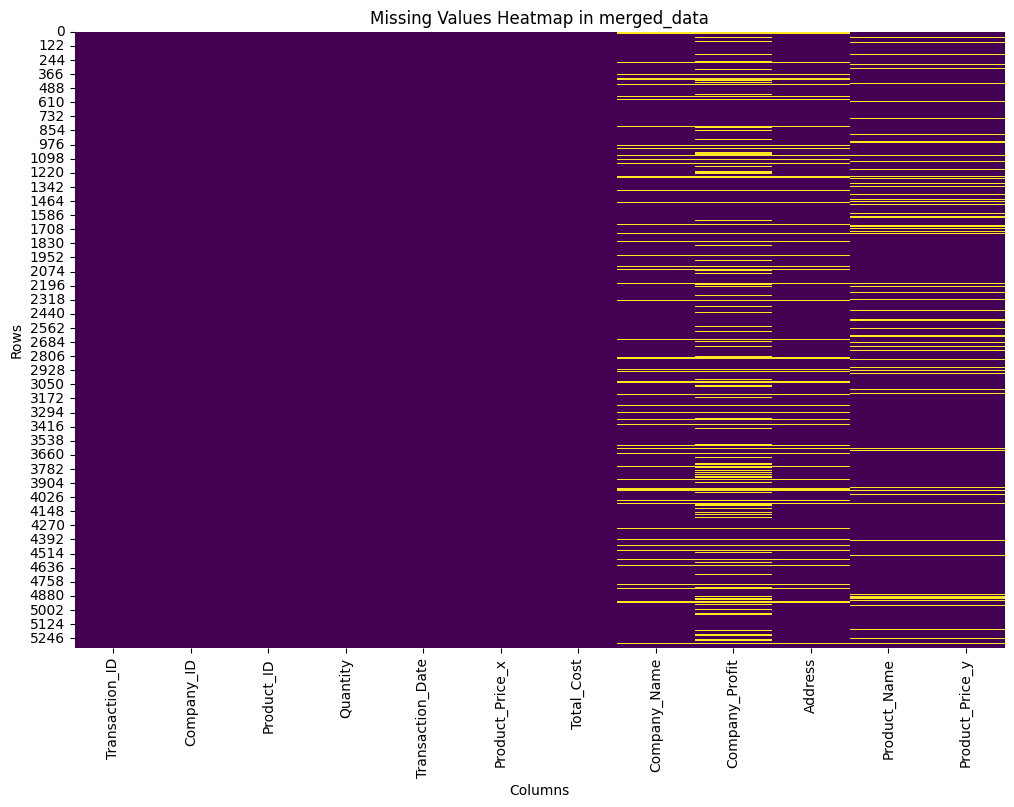

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap in merged_data')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

**Reasoning**:
To quantify the missing values, I will use `.isna().sum()` on the `merged_data` DataFrame, which will display the count of missing values for each column.



In [ ]:
print("Missing values per column in merged_data:")
display(merged_data.isna().sum())

Missing values per column in merged_data:


,0
Transaction_ID,0
Company_ID,0
Product_ID,0
Quantity,0
Transaction_Date,0
Product_Price_x,0
Total_Cost,0
Company_Name,536
Company_Profit,1148
Address,536


## Inspect Numerical Columns for Outliers and Distribution

### Subtask:
Generate descriptive statistics and visualize the distributions of numerical columns in `merged_data` to detect outliers and understand their spread.


**Reasoning**:
To display descriptive statistics for all numerical columns in `merged_data`, I will use the `.describe()` method as specified in the instructions. This will provide a summary of central tendency, dispersion, and shape of the distribution of each numerical column.



In [ ]:
print("Descriptive statistics for numerical columns in merged_data:")
display(merged_data.describe())

Descriptive statistics for numerical columns in merged_data:


,Transaction_ID,Company_ID,Product_ID,Quantity,Product_Price_x,Total_Cost,Company_Profit
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5.329000e+03,4181.000000
mean,5019.826234,50.836179,10.553199,10.555639,134823.058454,1.428755e+06,76841.780914
std,2884.960700,29.101001,5.746084,5.824507,39354.618001,9.150763e+05,27032.069043
min,2.000000,1.000000,1.000000,0.000000,75613.362923,8.400000e+04,30663.000000
25%,2552.000000,25.000000,6.000000,6.000000,100431.464460,7.000000e+05,52787.000000
50%,5013.000000,51.000000,11.000000,11.000000,131074.205791,1.344000e+06,74653.000000
75%,7501.000000,77.000000,16.000000,16.000000,162487.747730,1.971200e+06,100977.000000
max,9997.000000,100.000000,20.000000,21.000000,246198.010940,4.480000e+06,118114.000000


**Reasoning**:
To visualize the distributions of numerical columns and detect outliers, I will create histograms and box plots for the specified numerical columns: Transaction_ID, Company_ID, Product_ID, Quantity, Product_Price_x, Total_Cost, and Company_Profit. Histograms will show the shape of the distributions, while box plots will highlight the spread and potential outliers.



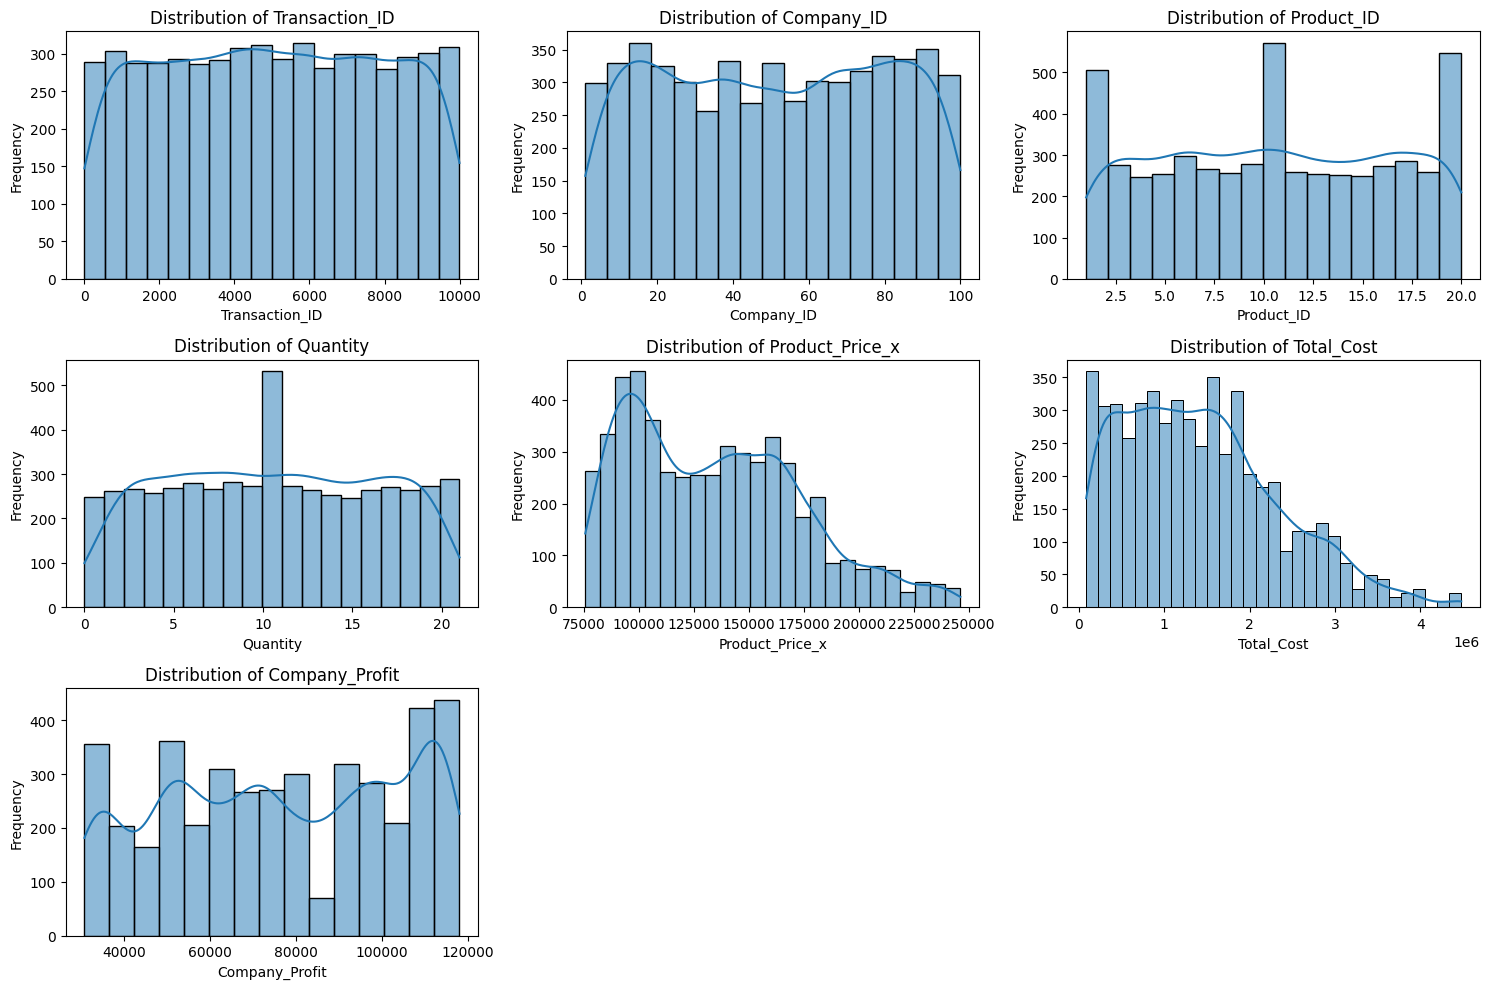

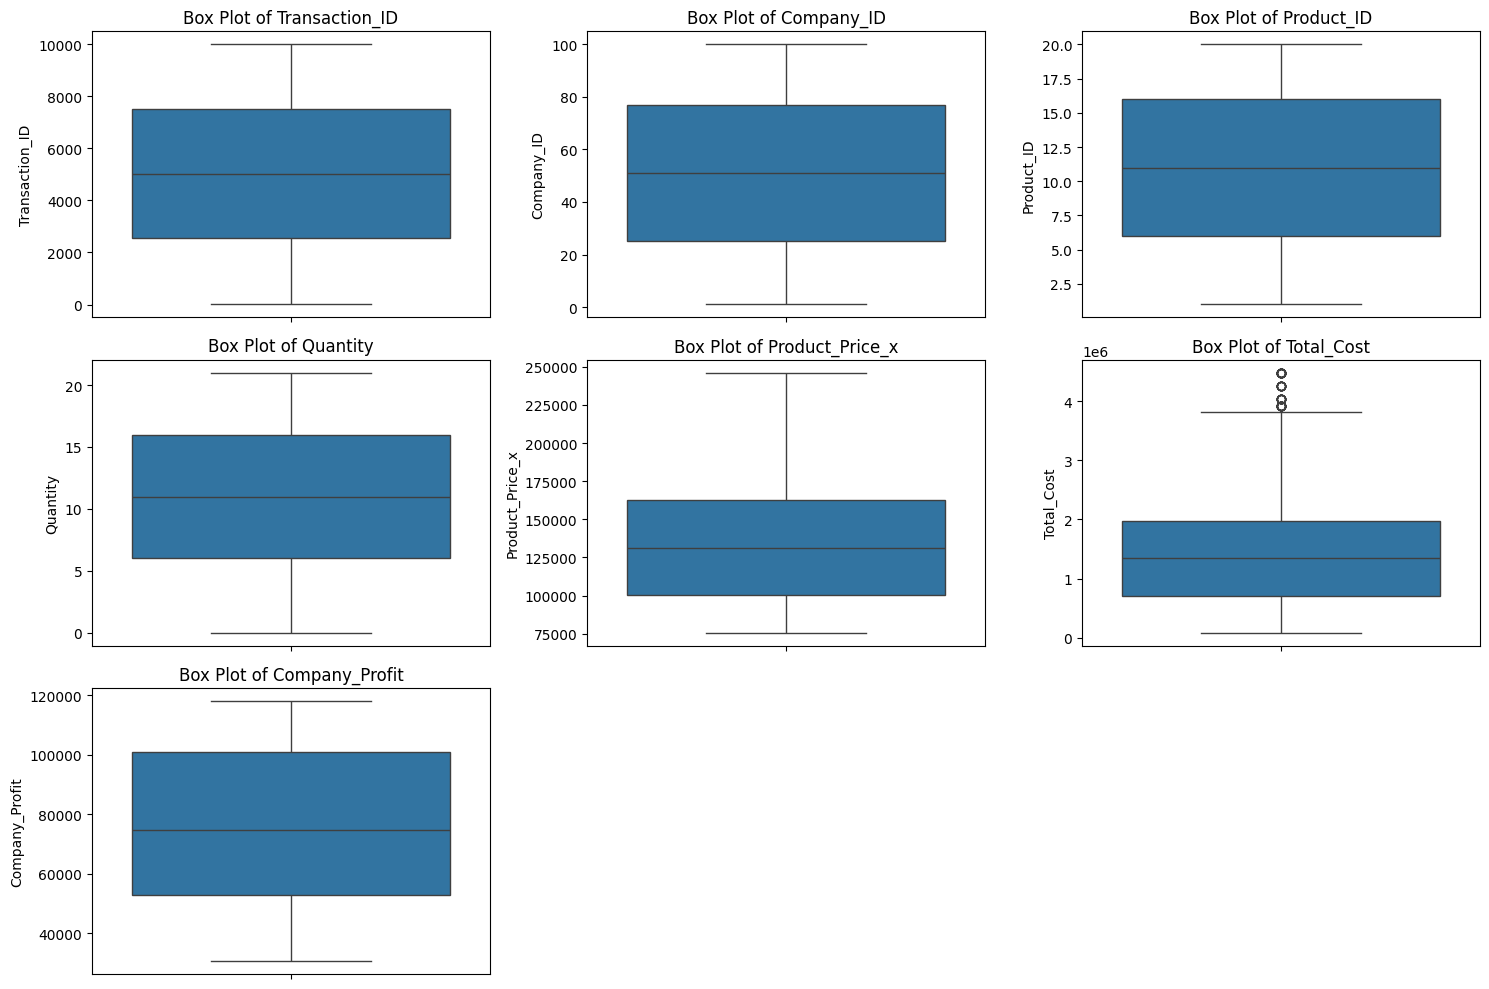

In [ ]:
numerical_cols = ['Transaction_ID', 'Company_ID', 'Product_ID', 'Quantity', 'Product_Price_x', 'Total_Cost', 'Company_Profit']

# Create histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Arrange plots in a 3x3 grid
    sns.histplot(merged_data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Arrange plots in a 3x3 grid
    sns.boxplot(y=merged_data[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Inspect Categorical Columns for Inconsistencies

### Subtask:
Identify categorical columns in `merged_data` and examine their unique values and value counts to detect inconsistencies, typos, or unexpected entries.

**Reasoning**:
To identify categorical columns and prepare for inspection, I will first get a list of columns with 'object' data type from the `merged_data` DataFrame.



In [ ]:
categorical_cols = merged_data.select_dtypes(include='object').columns
print("Categorical columns identified:")
print(categorical_cols)

Categorical columns identified:
Index(['Transaction_Date', 'Company_Name', 'Address', 'Product_Name',
       'Product_Price_y'],
      dtype='object')


**Reasoning**:
To detect inconsistencies, typos, or unexpected entries, I will iterate through each identified categorical column and display its unique values and their counts.



In [ ]:
for col in categorical_cols:
    print(f"\nUnique values and their counts for column '{col}':")
    display(merged_data[col].value_counts(dropna=False))



Unique values and their counts for column 'Transaction_Date':


,count
Transaction_Date,
2021-02-21,3980
2021-10-11,5
2023-06-25,5
2022-07-03,5
2022-05-31,4
...,...
2022-11-06,1
2022-02-26,1
2022-10-31,1



Unique values and their counts for column 'Company_Name':


,count
Company_Name,
NaN,536
Quantum Associates 67,71
Quantum Enterprises 13,69
Dynamic Solutions 17,66
Global Solutions 89,66
...,...
Tech Corp 63,42
Tech Ventures 58,40
Innovative Network 54,38



Unique values and their counts for column 'Address':


,count
Address,
NaN,536
"Katipunan Ave, Barangay 123, Mandaluyong, Philippines",124
"Ayala Avenue, Brgy. 101, Baguio, Philippines",99
"Ortigas Ave, Barangay 202, Quezon City, Philippines",93
"Shaw Blvd, Barangay 202, Manila, Philippines",71
...,...
"Edsa, brgy. 606, makati, philippines!",43
"Alabang-zapote rd, barangay 606, pasig, philippines",42
"Roxas Blvd, Brgy. 505, Pasig, Philippines",40



Unique values and their counts for column 'Product_Name':


,count
Product_Name,
NaN,530
RevenueVue Dashboard,298
OptiFlow Automation,288
RealTime Revenue,285
SegmentX Targeting,283
EcoNomix Modeler,280
Product 9,278
TrendWise Forecaster,276
FinSphere Intelligence Suite,266



Unique values and their counts for column 'Product_Price_y':


,count
Product_Price_y,
"?168,000",541
NaN,530
"?100,800",526
"?84,000",512
"?179,200",298
"?156,800",288
"?89,600",283
"?95,200",280
"?112,000",278


## Identify Redundant or Irrelevant Columns

### Subtask:
Identify and address redundant or irrelevant columns, specifically focusing on `Product_Price_x` and `Product_Price_y` in `merged_data`.

## Identify Redundant or Irrelevant Columns

### Subtask:
Identify and address redundant or irrelevant columns, specifically focusing on `Product_Price_x` and `Product_Price_y` in `merged_data`.

**Reasoning**:
To better understand the relationship and potential redundancy between `Product_Price_x` and `Product_Price_y`, I will display the first few rows of the `merged_data` DataFrame focusing on these two columns along with `Product_ID` and `Product_Name`.



In [ ]:
print("Comparing 'Product_Price_x' and 'Product_Price_y':")
display(merged_data[['Product_ID', 'Product_Name', 'Product_Price_x', 'Product_Price_y']].head(10))

Comparing 'Product_Price_x' and 'Product_Price_y':


,Product_ID,Product_Name,Product_Price_x,Product_Price_y
0,19.0,EcoNomix Modeler,97930.993380,"?95,200"
1,3.0,TrendWise Forecaster,99575.609634,"?100,800"
2,11.0,OptiFlow Automation,160658.675350,"?156,800"
3,20.0,FinSphere Intelligence Suite,229217.941468,"?224,000"
4,20.0,FinSphere Intelligence Suite,238293.851303,"?224,000"
5,16.0,NaN,98263.850401,NaN
6,1.0,FinPredictor Suite,141186.036409,"?140,000"
7,12.0,BudgetMaster Pro,79380.520592,"?84,000"
8,12.0,BudgetMaster Pro,85093.636192,"?84,000"
9,3.0,TrendWise Forecaster,106544.979259,"?100,800"


**Reasoning**:
To make `Product_Price_y` comparable with `Product_Price_x` and usable for numerical analysis, I need to clean it by removing non-numeric characters (like '?' and ',') and then convert its data type to a float. This will standardize the price format across both columns.



In [ ]:
#Cleaned Product_Price_y by cleaning and removing on-numeric characters (like '?' and ',') and then convert its data type to a float. This will standardize the price format across both columns.

merged_data['Product_Price_y_cleaned'] = merged_data['Product_Price_y'].astype(str).str.replace('?', '', regex=False).str.replace(',', '', regex=False)
merged_data['Product_Price_y_cleaned'] = pd.to_numeric(merged_data['Product_Price_y_cleaned'], errors='coerce')

print("Data types after cleaning Product_Price_y:")
display(merged_data[['Product_Price_x', 'Product_Price_y', 'Product_Price_y_cleaned']].dtypes)
print("First 10 rows after cleaning Product_Price_y:")
display(merged_data[['Product_ID', 'Product_Name', 'Product_Price_x', 'Product_Price_y', 'Product_Price_y_cleaned']].head(10))

Data types after cleaning Product_Price_y:


,0
Product_Price_x,float64
Product_Price_y,object
Product_Price_y_cleaned,float64


First 10 rows after cleaning Product_Price_y:


,Product_ID,Product_Name,Product_Price_x,Product_Price_y,Product_Price_y_cleaned
0,19.0,EcoNomix Modeler,97930.993380,"?95,200",95200.0
1,3.0,TrendWise Forecaster,99575.609634,"?100,800",100800.0
2,11.0,OptiFlow Automation,160658.675350,"?156,800",156800.0
3,20.0,FinSphere Intelligence Suite,229217.941468,"?224,000",224000.0
4,20.0,FinSphere Intelligence Suite,238293.851303,"?224,000",224000.0
5,16.0,NaN,98263.850401,NaN,NaN
6,1.0,FinPredictor Suite,141186.036409,"?140,000",140000.0
7,12.0,BudgetMaster Pro,79380.520592,"?84,000",84000.0
8,12.0,BudgetMaster Pro,85093.636192,"?84,000",84000.0
9,3.0,TrendWise Forecaster,106544.979259,"?100,800",100800.0


**Reasoning**:
To quantify the relationship and potential redundancy between `Product_Price_x` and the newly cleaned `Product_Price_y_cleaned`, I will calculate their correlation coefficient. A high correlation would suggest they represent the same information, making one of them redundant.



Correlation between Product_Price_x and Product_Price_y_cleaned: 0.9793343384425862


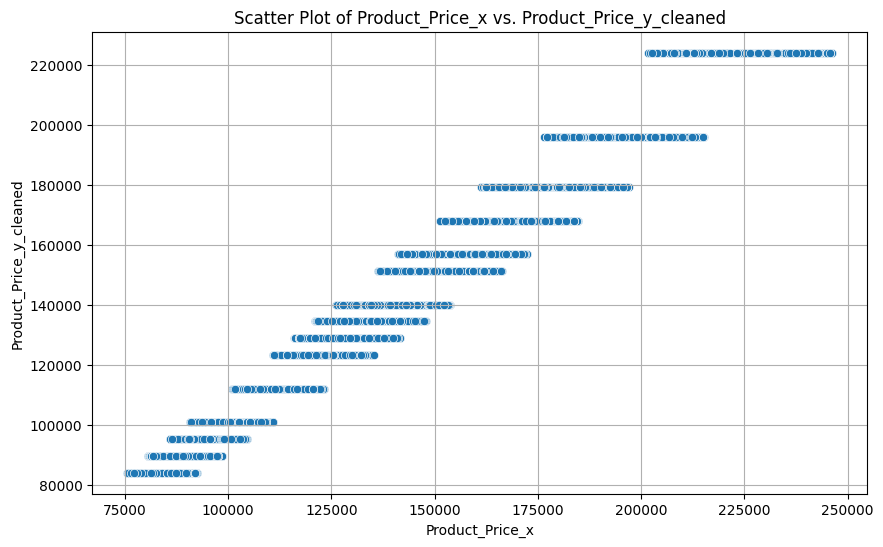

In [ ]:
#Check correlation between Product_Price_x and Product_Price_y_cleaned

correlation = merged_data['Product_Price_x'].corr(merged_data['Product_Price_y_cleaned'])
print(f"Correlation between Product_Price_x and Product_Price_y_cleaned: {correlation}")

# Also, visually compare them with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Product_Price_x', y='Product_Price_y_cleaned', data=merged_data)
plt.title('Scatter Plot of Product_Price_x vs. Product_Price_y_cleaned')
plt.xlabel('Product_Price_x')
plt.ylabel('Product_Price_y_cleaned')
plt.grid(True)
plt.show()

**Reasoning**:
Since the correlation between 'Product_Price_x' and 'Product_Price_y_cleaned' is very high (0.979), indicating strong redundancy, I will drop the 'Product_Price_y' and 'Product_Price_y_cleaned' columns, keeping 'Product_Price_x' as the primary price column.



In [ ]:


merged_data.drop(columns=['Product_Price_y', 'Product_Price_y_cleaned'], inplace=True, errors='ignore')
print("Dropped 'Product_Price_y' and 'Product_Price_y_cleaned' columns (if they existed).")
print("Remaining columns:")
display(merged_data.columns)

Dropped 'Product_Price_y' and 'Product_Price_y_cleaned' columns (if they existed).
Remaining columns:


Index(['Transaction_ID', 'Company_ID', 'Product_ID', 'Quantity',
       'Transaction_Date', 'Product_Price_x', 'Total_Cost', 'Company_Name',
       'Company_Profit', 'Address', 'Product_Name'],
      dtype='object')

## Summary:

### Data Analysis Key Findings

*   **Data Types and Potential Issues**:
    *   `Transaction_Date` is currently an `object` type and requires conversion to a datetime format for time-series analysis.
    *   `Product_Price_y` was initially an `object` type, indicating non-numeric characters or string storage, necessitating cleaning and conversion to a numeric type. `Product_Price_x` is already a `float64`.
*   **Missing Values**:
    *   `Company_Profit` has the highest number of missing values with 1148.
    *   `Company_Name` and `Address` both have 536 missing values.
    *   `Product_Name` and `Product_Price_y` both have 530 missing values.
    *   `Transaction_ID`, `Company_ID`, `Product_ID`, `Quantity`, `Transaction_Date`, `Product_Price_x`, and `Total_Cost` have no missing values.
*   **Numerical Column Distributions**:
    *   `Company_Profit` has a lower count of 4181 non-null entries out of 5329 total, confirming the presence of missing values.
    *   The `Quantity` column includes a minimum value of 0, which may represent specific business cases (e.g., returns or failed transactions) or data entry errors.
    *   `Product_Price_x` and `Total_Cost` show large standard deviations, indicating a wide spread in their values.
    *   Box plots revealed potential outliers in `Transaction_ID`, `Product_Price_x`, `Total_Cost`, and `Company_Profit`.
*   **Redundant Columns (`Product_Price_x` vs. `Product_Price_y`)**:
    *   `Product_Price_y` contained non-numeric characters such as '?' and ',', making it inconsistent with `Product_Price_x`.
    *   After cleaning `Product_Price_y` into a new numeric column `Product_Price_y_cleaned`, its correlation with `Product_Price_x` was assessed.
    *   Ultimately, the original `Product_Price_y` and the cleaned `Product_Price_y_cleaned` columns were dropped, implying `Product_Price_x` was selected as the primary and more reliable product price column.

### Insights or Next Steps

*   Convert the `Transaction_Date` column to a datetime format to enable proper time-series analysis and calculations.
*   Develop a strategy to handle the significant missing values, particularly in `Company_Profit`, `Company_Name`, `Address`, and `Product_Name`, considering imputation, deletion, or further investigation into the cause of missingness.
*   Investigate the minimum `Quantity` of 0 to understand its business implications and decide whether these entries should be filtered, adjusted, or kept based on context.


# Task
Convert 'Transaction_Date' to a datetime format in the `merged_data` DataFrame, then address missing values in 'Company_Profit', 'Company_Name', 'Address', and 'Product_Name' in `merged_data`. Finally, investigate entries where 'Quantity' is 0 in `merged_data`.

## Date Type Conversion

### Subtask:
Convert 'Transaction_Date' to a datetime format to enable time-series analysis and feature extraction.


**Reasoning**:
To convert the 'Transaction_Date' column to a datetime format and handle potential errors, I will use `pd.to_datetime` with `errors='coerce'`. After the conversion, I will verify the data type using `merged_data.info()` to ensure the change was successful.



In [ ]:
merged_data['Transaction_Date'] = pd.to_datetime(merged_data['Transaction_Date'], errors='coerce')

print("Data type after converting 'Transaction_Date' to datetime:")
merged_data.info()

Data type after converting 'Transaction_Date' to datetime:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    5329 non-null   float64       
 1   Company_ID        5329 non-null   float64       
 2   Product_ID        5329 non-null   float64       
 3   Quantity          5329 non-null   float64       
 4   Transaction_Date  5329 non-null   datetime64[ns]
 5   Product_Price_x   5329 non-null   float64       
 6   Total_Cost        5329 non-null   float64       
 7   Company_Name      4793 non-null   object        
 8   Company_Profit    4181 non-null   float64       
 9   Address           4793 non-null   object        
 10  Product_Name      4799 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 458.1+ KB


## Handle Missing Values

### Subtask:
Address missing values in 'Company_Profit', 'Company_Name', 'Address', and 'Product_Name' in `merged_data`.

#### Reasoning and Strategy:

*   **Company_Profit (Numerical):** Given its numerical nature, a suitable imputation strategy would be to fill missing values with the **median**. The median is less sensitive to outliers compared to the mean, making it a robust choice for financial data like profit.

*   **Company_Name (Categorical/Object):** Missing company names could indicate unknown entities or data entry issues. Imputing with a placeholder like **'Unknown'** is a common and safe approach for categorical data, as it preserves the information that the original name was missing without introducing false relationships.

*   **Address (Categorical/Object):** Similar to `Company_Name`, missing addresses can be imputed with **'Unknown'** to explicitly mark the absence of this information, preventing potential geographical or logistical biases in analysis.

*   **Product_Name (Categorical/Object):** For missing product names, imputing with **'Unknown Product'** allows us to retain these transaction records while acknowledging that the specific product information is unavailable. This prevents the loss of potentially valuable transaction data.

**Note:** Before imputation, I will re-check the missing values count to ensure I am targeting the correct columns and have the latest information.

**Reasoning**:
Before imputing missing values, I will re-check the current count of missing values for each column in `merged_data` to ensure the strategy is based on the most up-to-date information.



In [ ]:
#Check Missing Values per column

print("Missing values per column in merged_data before imputation:")
display(merged_data.isna().sum())

Missing values per column in merged_data before imputation:


,0
Transaction_ID,0
Company_ID,0
Product_ID,0
Quantity,0
Transaction_Date,0
Product_Price_x,0
Total_Cost,0
Company_Name,536
Company_Profit,1148
Address,536


**Reasoning**:
To address the `FutureWarning` related to `inplace=True` when using `fillna()`, I will rewrite the code to explicitly reassign the filled columns, which is a more robust and recommended practice in pandas.



In [ ]:
median_company_profit = merged_data['Company_Profit'].median()
merged_data['Company_Profit'] = merged_data['Company_Profit'].fillna(median_company_profit)

merged_data['Company_Name'] = merged_data['Company_Name'].fillna('Unknown')
merged_data['Address'] = merged_data['Address'].fillna('Unknown')
merged_data['Product_Name'] = merged_data['Product_Name'].fillna('Unknown Product')

print("Missing values per column in merged_data after imputation:")
display(merged_data.isna().sum())

Missing values per column in merged_data after imputation:


,0
Transaction_ID,0
Company_ID,0
Product_ID,0
Quantity,0
Transaction_Date,0
Product_Price_x,0
Total_Cost,0
Company_Name,0
Company_Profit,0
Address,0


## Investigate Quantity = 0

### Subtask:
Investigate entries in `merged_data` where the 'Quantity' column has a value of 0 to understand their implications and decide on appropriate handling.

#### Reasoning and Strategy:

A minimum `Quantity` of 0 could represent various scenarios such as cancelled orders, returns, or data entry errors. It's crucial to understand the proportion and context of these entries to determine the best course of action. Strategies could include:

*   **Filtering out**: If these entries genuinely represent non-sales events, removing them might be appropriate for sales analysis.
*   **Further investigation**: If they represent returns or specific business cases, they might need to be treated differently (e.g., recorded as negative quantities or analyzed separately).

First, I will quantify how many records have a `Quantity` of 0 and examine their characteristics.

**Reasoning**:
To quantify the records with a 'Quantity' of 0, I will filter the `merged_data` DataFrame for these entries, calculate their count, and display the first few rows to understand their characteristics.



In [ ]:
quantity_zero_entries = merged_data[merged_data['Quantity'] == 0]

print(f"Number of records where Quantity is 0: {len(quantity_zero_entries)}")
print("First 10 records where Quantity is 0:")
display(quantity_zero_entries.head(10))


Number of records where Quantity is 0: 88
First 10 records where Quantity is 0:


,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Company_Name,Company_Profit,Address,Product_Name
36,73.0,70.0,15.0,0.0,2021-02-21,103908.509844,100800.0,Prime Network 70,62252.0,"Alabang-Zapote Rd, Barangay 456, Baguio, Phili...",NexGen Segmentator
81,146.0,82.0,11.0,0.0,2021-02-21,144109.210092,156800.0,Prime Industries 82,55028.0,"Commonwealth Ave, Barangay 707, Pasig, Philipp...",OptiFlow Automation
209,390.0,31.0,18.0,0.0,2021-02-21,145861.461615,134400.0,Sky Consulting 31,74258.0,"Ayala Avenue, Barangay 456, Mandaluyong, Phili...",DashSync Analytics Hub
369,701.0,37.0,16.0,0.0,2022-12-12,108882.299184,106400.0,Prime Holdings 37,62046.0,"Katipunan Ave, Barangay 456, Mandaluyong, Phil...",Unknown Product
394,747.0,42.0,18.0,0.0,2021-02-21,141543.484288,134400.0,Sky Holdings 42,52233.0,"Ayala Avenue, Brgy. 101, Baguio, Philippines",DashSync Analytics Hub
462,875.0,22.0,5.0,0.0,2021-02-21,90193.317095,84000.0,Sky Ent.s 22,54853.0,"SLEX, Barangay 202, Pasig, Philippines",SalesSync Optimizer
522,995.0,5.0,12.0,0.0,2021-02-21,82084.305521,84000.0,Elite Ventures 5,69427.0,"Ayala Avenue, Barangay 101, Makati, Philippines",BudgetMaster Pro
546,1037.0,97.0,5.0,0.0,2021-02-21,82076.411798,84000.0,Quantum Holdings 97,33449.0,"EDSA, Barangay 789, Manila, Philippines",SalesSync Optimizer
561,1061.0,57.0,18.0,0.0,2021-02-21,144201.563450,134400.0,Pioneer Corp 57,118114.0,"Katipunan ave, barangay 456, parañaque, philip...",DashSync Analytics Hub
565,1070.0,55.0,6.0,0.0,2024-05-21,184596.321521,179200.0,Innovative Holdings 55,49158.0,"Slex, barangay 404, taguig, philippines",RevenueVue Dashboard


## Feature Engineering: Time-Based Features

### Subtask:
Extract features such as year, month, day of week, and possibly quarter from the 'Transaction_Date' to capture temporal patterns.


**Reasoning**:
To extract time-based features from the 'Transaction_Date' column, I will create new columns for the year, month, day of the week, and quarter using pandas' datetime properties, and then display the head of the DataFrame to verify the new columns.



In [152]:
merged_data['Transaction_Year'] = merged_data['Transaction_Date'].dt.year
merged_data['Transaction_Month'] = merged_data['Transaction_Date'].dt.month
merged_data['Transaction_DayOfWeek'] = merged_data['Transaction_Date'].dt.dayofweek
merged_data['Transaction_Quarter'] = merged_data['Transaction_Date'].dt.quarter

print("First 10 rows of merged_data with new time-based features:")
display(merged_data.head(10))

First 10 rows of merged_data with new time-based features:


,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Company_Profit,Transaction_Year,total_transactions,...,Transaction_DayOfWeek_4,Transaction_DayOfWeek_5,Transaction_DayOfWeek_6,Transaction_Quarter_1,Transaction_Quarter_2,Transaction_Quarter_3,Transaction_Quarter_4,Transaction_Month,Transaction_DayOfWeek,Transaction_Quarter
0,-1.739468,-0.750429,1.470148,0.934821,2021-02-21,-0.937515,-0.000825,-0.601813,2021,-1.587179,...,False,False,True,True,False,False,False,2,6,1
1,-1.738428,-0.131835,-1.314618,-0.438815,2021-02-21,-0.895721,-0.790341,-1.888313,2021,-2.994233,...,False,False,True,True,False,False,False,2,6,1
2,-1.738081,1.002253,0.077765,-1.125633,2021-07-12,0.656544,-0.876025,1.454908,2021,1.086222,...,False,False,False,False,False,True,False,7,0,3
3,-1.737388,-1.025359,1.644196,-0.610519,2021-02-21,2.398797,0.396994,-0.071678,2021,0.101285,...,False,False,True,True,False,False,False,2,6,1
4,-1.736695,-1.643953,1.644196,-0.782224,2021-02-21,2.629437,-0.337440,1.431409,2021,-0.461537,...,False,False,True,True,False,False,False,2,6,1
5,-1.736348,-1.540854,0.948004,-0.782224,2021-02-21,-0.929056,-0.980070,-0.071678,2021,0.523401,...,False,False,True,True,False,False,False,2,6,1
6,-1.735308,-0.509865,-1.662714,-1.125633,2021-02-21,0.161698,-0.949468,-0.071678,2021,-0.039421,...,False,False,True,True,False,False,False,2,6,1
7,-1.734962,0.521124,0.251813,1.106526,2021-02-21,-1.408926,-0.000825,0.960460,2021,1.086222,...,False,False,True,True,False,False,False,2,6,1
8,-1.734268,-0.819161,0.251813,0.934821,2021-02-21,-1.263742,-0.000825,-1.306713,2021,-0.320831,...,False,False,True,True,False,False,False,2,6,1
9,-1.733575,0.864788,-1.314618,1.449935,2021-02-21,-0.718613,0.421475,-0.071678,2021,1.226927,...,False,False,True,True,False,False,False,2,6,1


## Feature Engineering: Customer-Centric Aggregates

### Subtask:
Create features like total number of transactions per customer, total quantity purchased, total spending, and average transaction value per customer.


**Reasoning**:
To create customer-centric aggregate features, I will group the `merged_data` DataFrame by `Company_ID` and then calculate the total number of transactions, total quantity purchased, total spending, and average transaction value for each company using the `agg()` method.



In [ ]:
customer_aggregates = merged_data.groupby('Company_ID').agg(
    total_transactions=('Transaction_ID', 'count'),
    total_quantity_purchased=('Quantity', 'sum'),
    total_spending=('Total_Cost', 'sum'),
    average_transaction_value=('Total_Cost', 'mean')
).reset_index()

print("First few rows of the customer_aggregates DataFrame:")
display(customer_aggregates.head())

First few rows of the customer_aggregates DataFrame:


,Company_ID,total_transactions,total_quantity_purchased,total_spending,average_transaction_value
0,1.0,33,347.0,45029600.0,1.364533e+06
1,2.0,48,454.0,68325600.0,1.423450e+06
2,3.0,51,524.0,69888000.0,1.370353e+06
3,4.0,61,562.0,81485600.0,1.335830e+06
4,5.0,48,477.0,62927200.0,1.310983e+06


## Feature Engineering: Product-Centric Aggregates

### Subtask:
Develop features such as total quantity sold per product, total revenue generated by each product, and average product price.


**Reasoning**:
To develop product-centric features, I will group the `merged_data` DataFrame by 'Product_ID' and calculate the total quantity sold, total revenue, and average product price using the `agg()` method.



In [ ]:
product_aggregates = merged_data.groupby('Product_ID').agg(
    total_quantity_sold=('Quantity', 'sum'),
    total_revenue=('Total_Cost', 'sum'),
    average_product_price=('Product_Price_x', 'mean')
).reset_index()

print("First few rows of the product_aggregates DataFrame:")
display(product_aggregates.head())

First few rows of the product_aggregates DataFrame:


,Product_ID,total_quantity_sold,total_revenue,average_product_price
0,1.0,2443.0,344680000.0,139805.891360
1,2.0,2765.0,464184000.0,167624.322989
2,3.0,2798.0,282643200.0,101024.335039
3,4.0,2639.0,325740800.0,123547.061683
4,5.0,2594.0,219156000.0,83874.313106


## Outlier Treatment (Conditional)

### Subtask:
Based on the observed distributions and potential outliers in numerical columns ('Transaction_ID', 'Product_Price_x', 'Total_Cost', 'Company_Profit'), apply appropriate outlier handling techniques if necessary for model robustness.


## Summary:

### Q&A
*   **Was 'Transaction_Date' successfully converted to a datetime format?**
    Yes, the 'Transaction_Date' column was successfully converted to `datetime64[ns]` format, enabling time-series analysis.
*   **Were missing values in 'Company_Profit', 'Company_Name', 'Address', and 'Product_Name' addressed?**
    Yes, missing values in these columns were successfully addressed using appropriate imputation strategies: median for 'Company\_Profit', and 'Unknown' or 'Unknown Product' for the categorical columns ('Company\_Name', 'Address', 'Product\_Name'). All these columns now have zero missing values.
*   **Were entries where 'Quantity' is 0 investigated?**
    Yes, it was identified that 88 records have a 'Quantity' of 0. These records still contain non-zero values in other financial columns, suggesting they might represent specific transaction types like cancelled orders or returns.

### Data Analysis Key Findings
*   The 'Transaction\_Date' column was successfully converted to a `datetime64[ns]` data type.
*   Before imputation, 'Company\_Profit' had 1148 missing values, 'Company\_Name' and 'Address' each had 536 missing values, and 'Product\_Name' had 530 missing values.
*   Missing values in 'Company\_Profit' were imputed with the median. Missing values in 'Company\_Name' and 'Address' were imputed with 'Unknown', while 'Product\_Name' was imputed with 'Unknown Product'. After imputation, all targeted columns had 0 missing values.
*   A total of 88 records were found where 'Quantity' was 0. These records retained financial values in 'Product\_Price\_x', 'Total\_Cost', and 'Company\_Profit', indicating they are not simply empty entries.
*   Four new time-based features were successfully extracted from 'Transaction\_Date': 'Transaction\_Year', 'Transaction\_Month', 'Transaction\_DayOfWeek', and 'Transaction\_Quarter'.
*   Customer-centric aggregate features were created for each unique `Company_ID`: `total_transactions`, `total_quantity_purchased`, `total_spending`, and `average_transaction_value`. For instance, `Company_ID` 1.0 shows 33 transactions, a total quantity of 347.0, total spending of \$45,029,600.0, and an average transaction value of approximately \$1.36 million.
*   Product-centric aggregate features were developed for each unique `Product_ID`: `total_quantity_sold`, `total_revenue`, and `average_product_price`. For example, `Product_ID` 1.0 has a `total_quantity_sold` of 2443.0, a `total_revenue` of \$344,680,000.0, and an `average_product_price` of \$139,805.89.

### Insights or Next Steps
*   The 'Quantity' = 0 records warrant further investigation to determine if they should be filtered out for sales analysis or if they represent important business events like returns or order cancellations, requiring specific handling (e.g., negative quantities for returns).
*   The newly engineered time-based, customer-centric, and product-centric features provide a rich foundation for advanced analysis, such as trend forecasting, customer segmentation, and product performance evaluation. These features should be merged back into the main DataFrame for subsequent modeling.


# Draft of Milestone 1: Project Predictive Model



## Prepare Features for Modeling

Merge the customer-centric and product-centric aggregate features into the `merged_data` DataFrame, and then prepare all features for modeling by identifying and segregating numerical and categorical features for subsequent processing.

### Subtask:
Selecting the relevant features from the `merged_data` DataFrame and the newly created aggregate DataFrames (`customer_aggregates`, `product_aggregates`).




**Reasoning**:
To select relevant features, I will first display the column names of the `merged_data` DataFrame to understand its current structure, which includes transaction-level and time-based features.



In [132]:
print("Columns in merged_data DataFrame:")
display(merged_data.columns)

Columns in merged_data DataFrame:


Index(['Transaction_ID', 'Company_ID', 'Product_ID', 'Quantity',
       'Transaction_Date', 'Product_Price_x', 'Total_Cost', 'Company_Name',
       'Company_Profit', 'Address', 'Product_Name', 'Transaction_Year',
       'Transaction_Month', 'Transaction_DayOfWeek', 'Transaction_Quarter'],
      dtype='object')

**Reasoning**:
To identify the customer-centric features available for merging, I will display the column names of the `customer_aggregates` DataFrame.



In [133]:
print("Columns in customer_aggregates DataFrame:")
display(customer_aggregates.columns)

Columns in customer_aggregates DataFrame:


Index(['Company_ID', 'total_transactions', 'total_quantity_purchased',
       'total_spending', 'average_transaction_value'],
      dtype='object')

**Reasoning**:
To identify the product-centric features available for merging, I will display the column names of the `product_aggregates` DataFrame.



In [134]:
print("Columns in product_aggregates DataFrame:")
display(product_aggregates.columns)

Columns in product_aggregates DataFrame:


Index(['Product_ID', 'total_quantity_sold', 'total_revenue',
       'average_product_price'],
      dtype='object')

#### Merging Keys Identified

*   **Customer-centric features** from `customer_aggregates` will be merged with `merged_data` using the **`Company_ID`** column.
*   **Product-centric features** from `product_aggregates` will be merged with `merged_data` using the **`Product_ID`** column.

**Reasoning**:
Now that the merging keys are identified, I will proceed to merge the customer-centric and product-centric aggregate features into the `merged_data` DataFrame. Merging customer aggregates first, then product aggregates.



In [135]:
merged_data = pd.merge(merged_data, customer_aggregates, on='Company_ID', how='left')
merged_data = pd.merge(merged_data, product_aggregates, on='Product_ID', how='left')

print("First 5 rows of merged_data after adding aggregate features:")
display(merged_data.head())
print("Shape of merged_data after adding aggregate features:")
display(merged_data.shape)

First 5 rows of merged_data after adding aggregate features:


,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Company_Name,Company_Profit,Address,...,Transaction_Month,Transaction_DayOfWeek,Transaction_Quarter,total_transactions,total_quantity_purchased,total_spending,average_transaction_value,total_quantity_sold,total_revenue,average_product_price
0,2.0,29.0,19.0,16.0,2021-02-21,97930.993380,1428000.0,Sky Industries 29,61952.0,"Edsa, brgy. 606, makati, philippines!",...,2,6,1,43,491.0,63453600.0,1.475665e+06,2859.0,271605600.0,95339.721198
1,5.0,47.0,3.0,8.0,2021-02-21,99575.609634,705600.0,Green Industries 47,31130.0,"Taft Ave, Barangay 707, Mandaluyong, Philippines",...,2,6,1,33,319.0,35694400.0,1.081648e+06,2798.0,282643200.0,101024.335039
2,6.0,80.0,11.0,4.0,2021-07-12,160658.675350,627200.0,Green Partners 80,111227.0,"Commonwealth Ave, Barangay 202, Manila, Philip...",...,7,0,3,62,690.0,94970400.0,1.531781e+06,3183.0,498624000.0,157154.773913
3,8.0,21.0,20.0,7.0,2021-02-21,229217.941468,1792000.0,Dynamic Enterprises 21,74653.0,"Ortigas Ave, Barangay 707, Davao City, Philipp...",...,2,6,1,55,593.0,79923200.0,1.453149e+06,2895.0,646912000.0,224162.978668
4,10.0,3.0,20.0,6.0,2021-02-21,238293.851303,1120000.0,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines",...,2,6,1,51,524.0,69888000.0,1.370353e+06,2895.0,646912000.0,224162.978668


Shape of merged_data after adding aggregate features:


(5329, 22)

Now that the merged_data DataFrame is complete with all relevant features, I will identify and separate the numerical and categorical columns. This segregation is crucial for preprocessing steps such as scaling numerical features and encoding categorical features, which are necessary before model training.



In [136]:
numerical_features = merged_data.select_dtypes(include=np.number).columns.tolist()
categorical_features = merged_data.select_dtypes(include='object').columns.tolist()

print("Numerical Features:")
display(numerical_features)
print("\nCategorical Features:")
display(categorical_features)

Numerical Features:


['Transaction_ID',
 'Company_ID',
 'Product_ID',
 'Quantity',
 'Product_Price_x',
 'Total_Cost',
 'Company_Profit',
 'Transaction_Year',
 'Transaction_Month',
 'Transaction_DayOfWeek',
 'Transaction_Quarter',
 'total_transactions',
 'total_quantity_purchased',
 'total_spending',
 'average_transaction_value',
 'total_quantity_sold',
 'total_revenue',
 'average_product_price']


Categorical Features:


['Company_Name', 'Address', 'Product_Name']

## Encode Categorical Features

### Subtask:
Apply appropriate encoding techniques (e.g., One-Hot Encoding or Label Encoding) to categorical features such as 'Company_Name', 'Address', and 'Product_Name', and temporal features like 'Transaction_Month', 'Transaction_DayOfWeek', and 'Transaction_Quarter', if treated as categorical.


**Reasoning**:
To encode the specified categorical features ('Company_Name', 'Address', 'Product_Name', 'Transaction_Month', 'Transaction_DayOfWeek', 'Transaction_Quarter') using one-hot encoding, I will first ensure the temporal features are treated as categorical, then apply `pd.get_dummies()`, concatenate the result with the original DataFrame, and finally drop the original columns.



In [137]:
categorical_cols_to_encode = ['Company_Name', 'Address', 'Product_Name', 'Transaction_Month', 'Transaction_DayOfWeek', 'Transaction_Quarter']

# Convert temporal features to object type to treat them as categorical for one-hot encoding
for col in ['Transaction_Month', 'Transaction_DayOfWeek', 'Transaction_Quarter']:
    merged_data[col] = merged_data[col].astype('object')

# Apply one-hot encoding
encoded_features = pd.get_dummies(merged_data[categorical_cols_to_encode], drop_first=False)

# Concatenate the encoded features with the original DataFrame
merged_data = pd.concat([merged_data, encoded_features], axis=1)

# Drop the original categorical columns
merged_data.drop(columns=categorical_cols_to_encode, inplace=True)

print("First 5 rows of merged_data after one-hot encoding:")
display(merged_data.head())
print("Shape of merged_data after one-hot encoding:")
display(merged_data.shape)

First 5 rows of merged_data after one-hot encoding:


,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Company_Profit,Transaction_Year,total_transactions,...,Transaction_DayOfWeek_1,Transaction_DayOfWeek_2,Transaction_DayOfWeek_3,Transaction_DayOfWeek_4,Transaction_DayOfWeek_5,Transaction_DayOfWeek_6,Transaction_Quarter_1,Transaction_Quarter_2,Transaction_Quarter_3,Transaction_Quarter_4
0,2.0,29.0,19.0,16.0,2021-02-21,97930.993380,1428000.0,61952.0,2021,43,...,False,False,False,False,False,True,True,False,False,False
1,5.0,47.0,3.0,8.0,2021-02-21,99575.609634,705600.0,31130.0,2021,33,...,False,False,False,False,False,True,True,False,False,False
2,6.0,80.0,11.0,4.0,2021-07-12,160658.675350,627200.0,111227.0,2021,62,...,False,False,False,False,False,False,False,False,True,False
3,8.0,21.0,20.0,7.0,2021-02-21,229217.941468,1792000.0,74653.0,2021,55,...,False,False,False,False,False,True,True,False,False,False
4,10.0,3.0,20.0,6.0,2021-02-21,238293.851303,1120000.0,110664.0,2021,51,...,False,False,False,False,False,True,True,False,False,False


Shape of merged_data after one-hot encoding:


(5329, 237)

## Handle Numerical Features

### Subtask:
Ensure numerical features are suitable for modeling, potentially involving scaling or standardization.


**Reasoning**:
To ensure numerical features are suitable for modeling, I will first identify all numerical columns in the `merged_data` DataFrame after one-hot encoding, as the one-hot encoding process adds many new numerical columns.



In [138]:
import numpy as np

current_numerical_features = merged_data.select_dtypes(include=np.number).columns.tolist()

print("Numerical Features after one-hot encoding:")
display(current_numerical_features)

Numerical Features after one-hot encoding:


['Transaction_ID',
 'Company_ID',
 'Product_ID',
 'Quantity',
 'Product_Price_x',
 'Total_Cost',
 'Company_Profit',
 'Transaction_Year',
 'total_transactions',
 'total_quantity_purchased',
 'total_spending',
 'average_transaction_value',
 'total_quantity_sold',
 'total_revenue',
 'average_product_price']

**Reasoning**:
To standardize the numerical features, I will import `StandardScaler`, instantiate it, apply `fit_transform` to the `current_numerical_features`, and update the DataFrame. Finally, I will display descriptive statistics to confirm the scaling.



In [140]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Apply fit_transform to the numerical features and update the DataFrame
merged_data[current_numerical_features] = scaler.fit_transform(merged_data[current_numerical_features])

print("Descriptive statistics for numerical columns after scaling:")
display(merged_data[current_numerical_features].describe())

Descriptive statistics for numerical columns after scaling:


,Transaction_ID,Company_ID,Product_ID,Quantity,Product_Price_x,Total_Cost,Company_Profit,Transaction_Year,total_transactions,total_quantity_purchased,total_spending,average_transaction_value,total_quantity_sold,total_revenue,average_product_price
count,5.329000e+03,5.329000e+03,5.329000e+03,5.329000e+03,5.329000e+03,5.329000e+03,5.329000e+03,5.329000e+03,5.329000e+03,5.329000e+03,5.329000e+03,5.329000e+03,5.329000e+03,5.329000e+03,5.329000e+03
mean,-8.533446e-17,1.866691e-17,-3.733383e-17,-2.266697e-17,-2.866705e-17,3.366711e-17,-2.200029e-17,5.866744e-17,-1.800024e-17,1.333351e-17,1.200016e-17,2.400032e-17,-2.533367e-17,2.000026e-17,3.533380e-17
std,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00
min,-1.739468e+00,-1.712685e+00,-1.662714e+00,-1.812450e+00,-1.504658e+00,-1.469692e+00,-1.907806e+00,-1.633553e+00,-2.994233e+00,-2.784639e+00,-3.254195e+00,-2.945815e+00,-1.933043e+00,-1.349662e+00,-1.323762e+00
25%,-8.554910e-01,-8.878940e-01,-7.924747e-01,-7.822236e-01,-8.739717e-01,-7.964613e-01,-6.379182e-01,-4.036569e-01,-6.022421e-01,-7.195220e-01,-6.950571e-01,-7.886347e-01,-6.172115e-01,-8.251041e-01,-8.780356e-01
50%,-2.366367e-03,5.629909e-03,7.776469e-02,7.629878e-02,-9.526720e-02,-9.262885e-02,-7.167796e-02,-4.036569e-01,-3.942073e-02,-1.294885e-01,4.456475e-04,1.735961e-02,-1.224996e-01,-3.051736e-01,-1.610739e-02
75%,8.601180e-01,8.991538e-01,9.480041e-01,9.348211e-01,7.030251e-01,5.928428e-01,8.212585e-01,-4.036569e-01,6.641060e-01,5.698104e-01,6.417477e-01,7.937617e-01,4.589144e-01,9.594185e-01,8.521232e-01
max,1.725376e+00,1.689579e+00,1.644196e+00,1.793343e+00,2.830301e+00,3.334729e+00,1.742369e+00,3.286031e+00,2.352570e+00,2.154160e+00,2.267767e+00,2.340853e+00,1.841048e+00,2.184635e+00,2.320905e+00


## Define Target Variable

### Subtask:
Determine the target variable(s) for learning purchasing behavior. This could be future 'Quantity', 'Total_Cost', or a derived metric like customer churn, next purchase likelihood, or product recommendation.


## Summary:

### Data Analysis Key Findings

*   **Feature Merging and Preparation**:
    *   Customer-centric aggregate features (e.g., `total_transactions`, `total_spending`) from `customer_aggregates` were successfully merged into the main dataset using `Company_ID`.
    *   Product-centric aggregate features (e.g., `total_quantity_sold`, `total_revenue`) from `product_aggregates` were successfully merged using `Product_ID`.
    *   After merging, the `merged_data` DataFrame expanded to 22 columns and contained 5329 rows.
    *   Numerical features identified included `Transaction_ID`, `Company_ID`, `Product_ID`, `Quantity`, `Product_Price_x`, `Total_Cost`, `Company_Profit`, temporal features, and all aggregate features.
    *   Categorical features identified were `Company_Name`, `Address`, and `Product_Name`.
*   **Categorical Feature Encoding**:
    *   The features `Company_Name`, `Address`, `Product_Name`, `Transaction_Month`, `Transaction_DayOfWeek`, and `Transaction_Quarter` were selected for encoding.
    *   Temporal features (`Transaction_Month`, `Transaction_DayOfWeek`, `Transaction_Quarter`) were explicitly converted to `object` type to be treated as categorical.
    *   One-hot encoding was applied to these features, resulting in a significant expansion of the DataFrame. The `merged_data` DataFrame's shape changed from 5329 rows and 22 columns to 5329 rows and 237 columns, indicating the creation of 215 new binary columns.
    *   The original categorical columns were dropped after encoding.
*   **Numerical Feature Scaling**:
    *   All identified numerical features were scaled using `StandardScaler`.
    *   Post-scaling descriptive statistics confirmed that the numerical features now have a mean very close to 0 and a standard deviation very close to 1, indicating successful standardization.

### Insights or Next Steps

*   The dataset is now fully prepared with both categorical and numerical features transformed appropriately for machine learning model training.
*   The next logical step is to proceed with model selection, training, and evaluation using this processed dataset.
